# Learning Team Exercise 2 - KNN Implementation
Identify your own dataset and implement a classifier or regressor prediction model. Follow the steps that we have discussed in class:

1. Choose a Dataset. Select a dataset for classification and another for regression.
2. Identify the feature and target variable X and y
3. Split the Data. Divide the data into a training set and a test set (typically 70/30 split).
4. Run and fit the model using an initial `K`.
5. Evaluate the performance of your model.

Create a summary after runnning the models discussing the following:
- Data Description: Summarize the dataset
- Target Variable: State the target variable
- Accuracy Metrics: List the metrics used and your model's performance.
- Optimal Model: Describe how you chose the optimal 'k' and any patterns noted.

#### 1. Dataset Loading

In [1]:
#Import Libraries here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
#Import dataset here
heart_all = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_all.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
#check the shape of the dataframe
heart_all.shape

#check the info of the data
heart_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
#Check the summary statistics of the data
heart_all.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [5]:
#check for missing values
heart_missing = heart_all.isnull().sum()
print(heart_missing)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


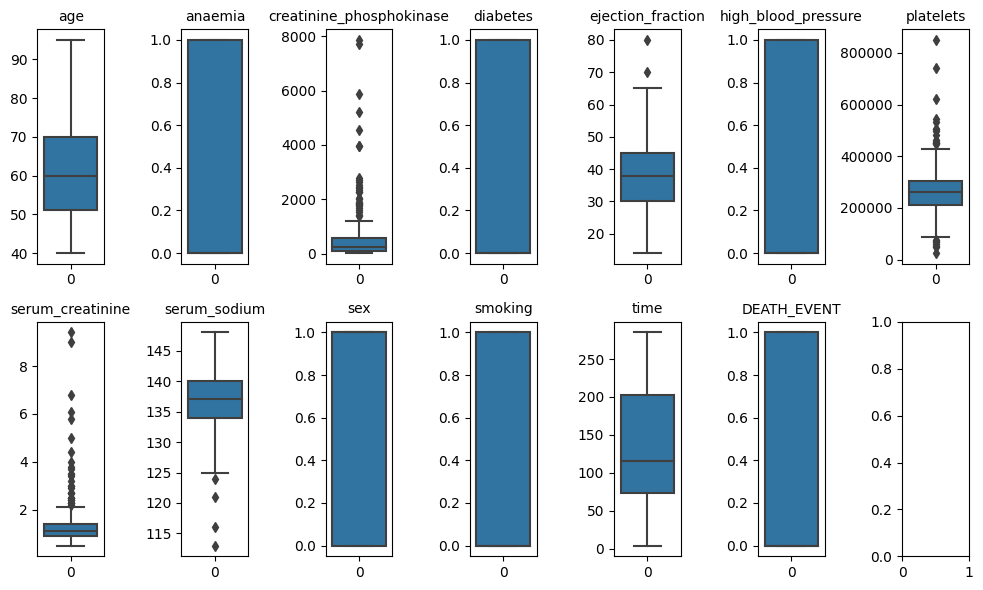

In [6]:
# Check for outliers
fig, axes = plt.subplots(2, 7, figsize=(10, 6))  # 1 row, 5 columns for 5 variables

for i, column in enumerate(heart_all.columns):
    row = i // 7
    col = i % 7
    sns.boxplot(data=heart_all[column], ax=axes[row,col])
    axes[row, col].set_title(f'{column}',fontsize=10)

plt.tight_layout()
plt.show()


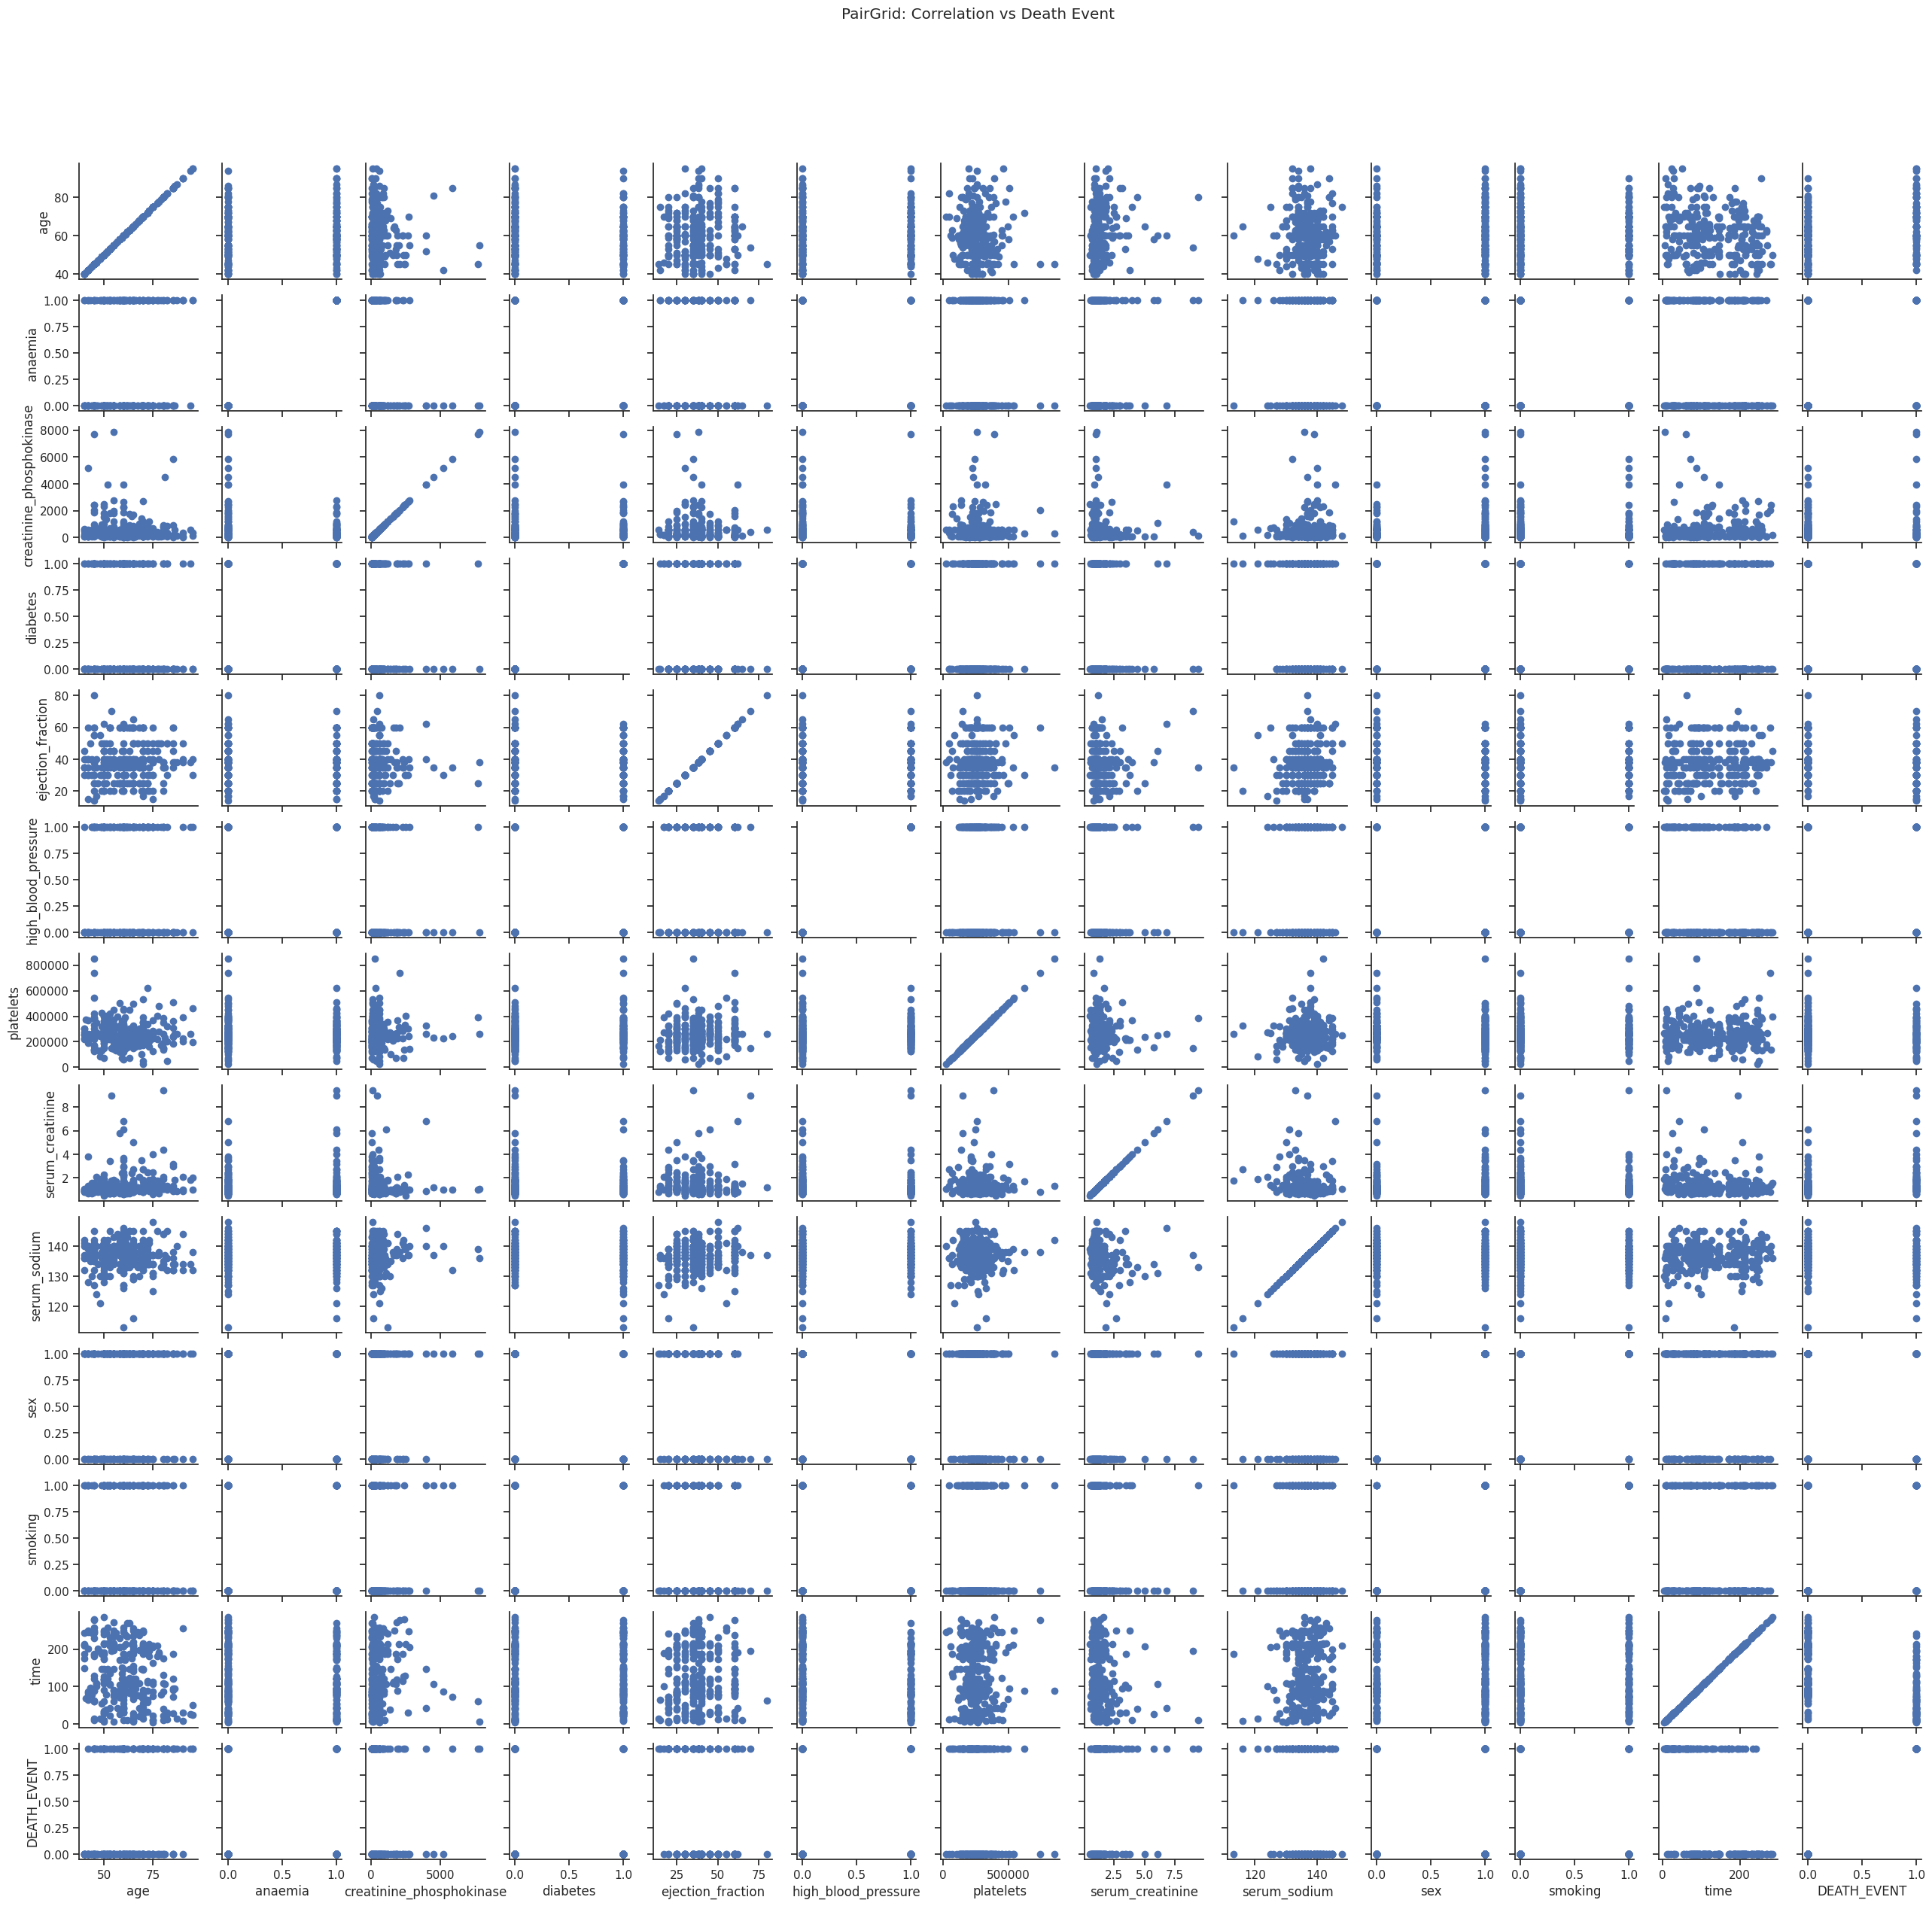

In [7]:
#check for correlation vs Death Event
sns.set_theme(style="ticks")
grid = sns.PairGrid(heart_all, height=2)
grid.map(plt.scatter)

# Adjust the layout to have two rows
plt.subplots_adjust(top=0.9)
grid.fig.suptitle('PairGrid: Correlation vs Death Event')
plt.show()

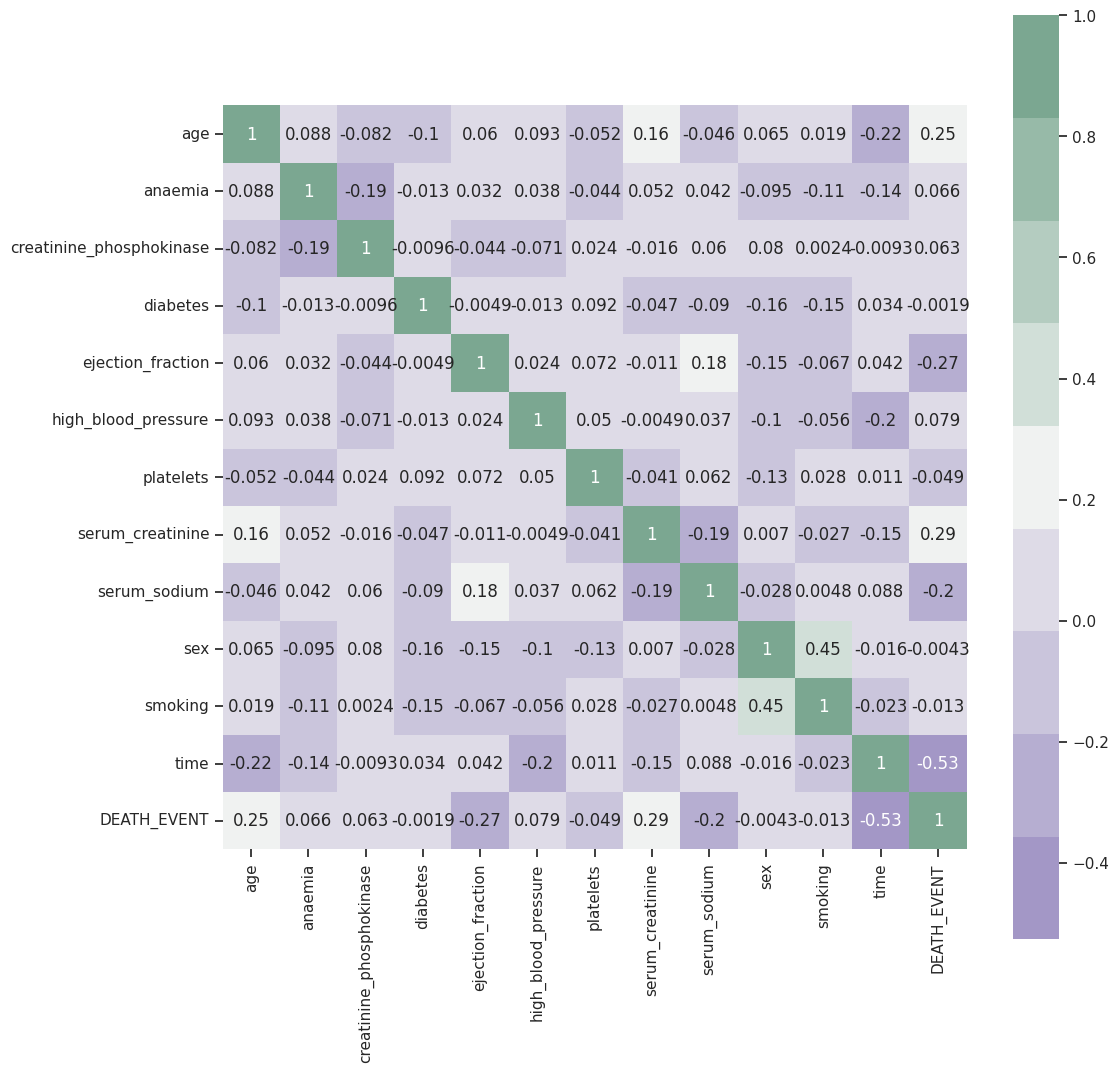

In [8]:
#Examaning a corelation matrix of all the features
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = heart_all.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

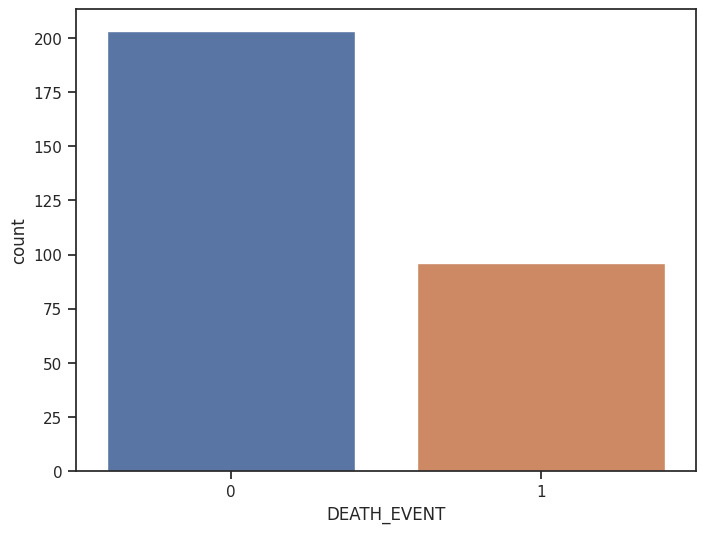

In [9]:
#check for the number of deaths
plt.figure(figsize=(8,6))
sns.countplot(x=heart_all['DEATH_EVENT'])
plt.show()

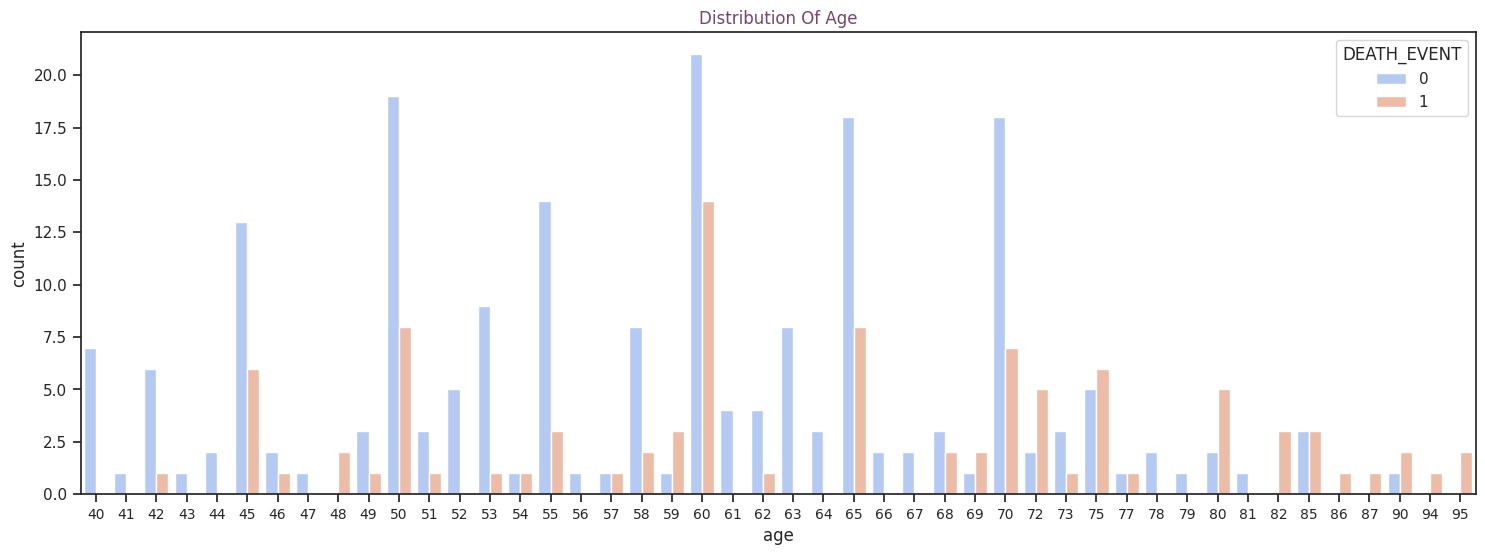

In [10]:
#convert age to integers
heart_all['age'] = heart_all['age'].astype(int)

#Evauating age distrivution
plt.figure(figsize=(18,6))
age_dist=sns.countplot(x=heart_all['age'],data=heart_all, hue ="DEATH_EVENT",palette=sns.color_palette('coolwarm', n_colors=2))
age_dist.set_title("Distribution Of Age", color="#774571")

# Set the x-axis label font size
age_dist.set_xticklabels(age_dist.get_xticklabels(), fontsize=10)
plt.show()

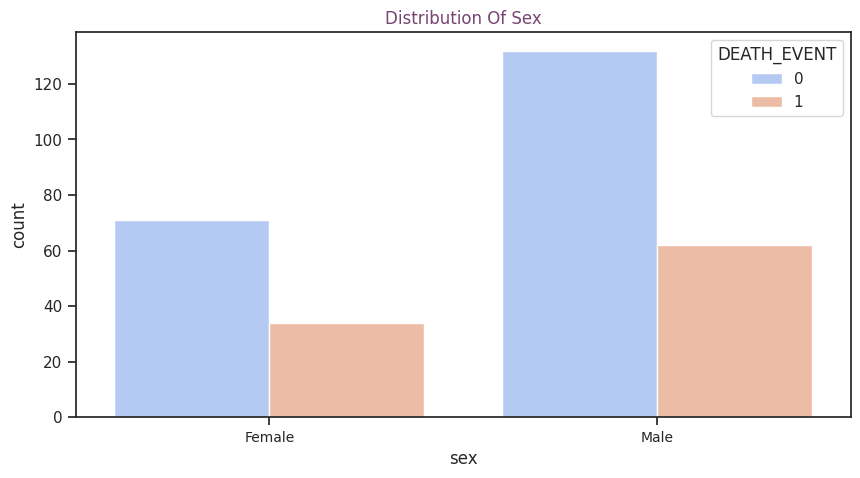

In [11]:
#check for distribution of sex


#Evauating age distrivution
plt.figure(figsize=(10,5))
sex_dist=sns.countplot(x=heart_all['sex'],data=heart_all, hue ="DEATH_EVENT",palette=sns.color_palette('coolwarm', n_colors=2))
sex_dist.set_title("Distribution Of Sex", color="#774571")

# Set the x-axis label font size
sex_label = ['Female','Male']
sex_dist.set_xticklabels(sex_label, fontsize=10)
plt.show()

In [12]:
#Splitting the X and y variables
X = heart_all.drop('DEATH_EVENT',axis=1)
y = heart_all['DEATH_EVENT']

#### 3. Split the data into train and test sets.

In [13]:
# Your Code Here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
#scaling of features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

X_train_scaled = scaler.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.fit_transform(X_test)
X_test_sc = pd.DataFrame(X_test_scaled)

#### 4. Run and fit the model

In [15]:
from sklearn.neighbors import KNeighborsClassifier
# Running our Regression Model
knn_reg = KNeighborsClassifier(n_neighbors=3)
knn_reg.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=3)

#### 5. Evaluate the performance of your model

In [16]:
# Your Code Here
#Testing our Prediction
y_pred = knn_reg.predict(X_test_sc)

#check the metrics

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[51 11]
 [14 14]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        62
           1       0.56      0.50      0.53        28

    accuracy                           0.72        90
   macro avg       0.67      0.66      0.67        90
weighted avg       0.71      0.72      0.72        90



In [17]:
trial = pd.DataFrame(y_test)
trial['Predicted Variable'] = y_pred
print(trial.head(20))

     DEATH_EVENT  Predicted Variable
206            0                   0
188            0                   0
12             1                   1
219            0                   0
237            0                   0
136            0                   0
228            0                   0
205            0                   0
52             1                   1
108            0                   1
240            0                   0
15             1                   1
184            1                   0
246            1                   0
22             1                   0
74             1                   1
269            0                   0
90             0                   0
227            0                   0
255            0                   0


In [18]:
train_accuracies = []
test_accuracies = []

# Range of k we want to try
k_values = range(1, 26)

for k in k_values:
    # Create KNN model with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model with training data
    knn.fit(X_train_sc, y_train)

    # Predict on training data and calculate training accuracy
    y_train_pred = knn.predict(X_train_sc)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Predict on test data and calculate test accuracy
    y_test_pred = knn.predict(X_test_sc)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)
    # Print results with 4 decimal places
    print(f'k={k:2d}  Train Accuracy: {train_accuracy:.4f}  Test Accuracy: {test_accuracy:.4f}')

k= 1  Train Accuracy: 1.0000  Test Accuracy: 0.6667
k= 2  Train Accuracy: 0.8086  Test Accuracy: 0.7111
k= 3  Train Accuracy: 0.8182  Test Accuracy: 0.7222
k= 4  Train Accuracy: 0.7273  Test Accuracy: 0.7000
k= 5  Train Accuracy: 0.7512  Test Accuracy: 0.7222
k= 6  Train Accuracy: 0.7081  Test Accuracy: 0.7111
k= 7  Train Accuracy: 0.7560  Test Accuracy: 0.7000
k= 8  Train Accuracy: 0.7368  Test Accuracy: 0.7000
k= 9  Train Accuracy: 0.7368  Test Accuracy: 0.7111
k=10  Train Accuracy: 0.7177  Test Accuracy: 0.7333
k=11  Train Accuracy: 0.7321  Test Accuracy: 0.7667
k=12  Train Accuracy: 0.7033  Test Accuracy: 0.7556
k=13  Train Accuracy: 0.7225  Test Accuracy: 0.7556
k=14  Train Accuracy: 0.7033  Test Accuracy: 0.7333
k=15  Train Accuracy: 0.7416  Test Accuracy: 0.7556
k=16  Train Accuracy: 0.7177  Test Accuracy: 0.7222
k=17  Train Accuracy: 0.7273  Test Accuracy: 0.7444
k=18  Train Accuracy: 0.6986  Test Accuracy: 0.7222
k=19  Train Accuracy: 0.7033  Test Accuracy: 0.7222
k=20  Train 

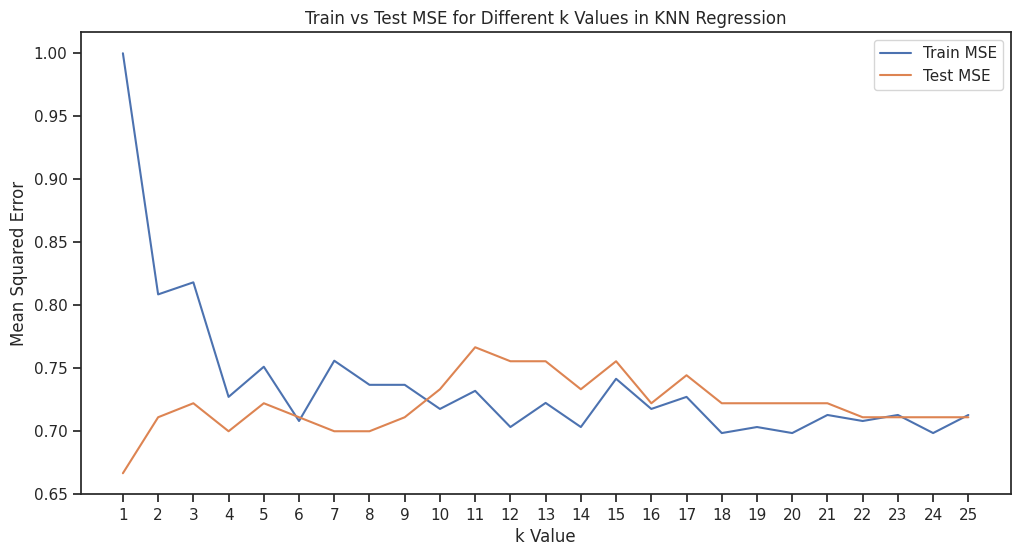

In [19]:
# Plot MSE values over different k values for both train and test sets
plt.figure(figsize=(12, 6))
plt.plot(range(1, 26), train_accuracies, label='Train MSE')
plt.plot(range(1, 26), test_accuracies, label='Test MSE')
plt.xticks(range(1,26))
plt.xlabel('k Value')
plt.ylabel('Mean Squared Error')
plt.title('Train vs Test MSE for Different k Values in KNN Regression')
plt.legend()
plt.show()

In [20]:
#Using GridSearch CV to determine best parameter

from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

model = GridSearchCV(knn_reg, params, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
model_search = model.fit(X_train_sc,y_train)
print(model_search.best_params_)

accuracy = model_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Fitting 10 folds for each of 14 candidates, totalling 140 fits
{'n_neighbors': 7}
Accuracy for our training dataset with tuning is : 70.81%


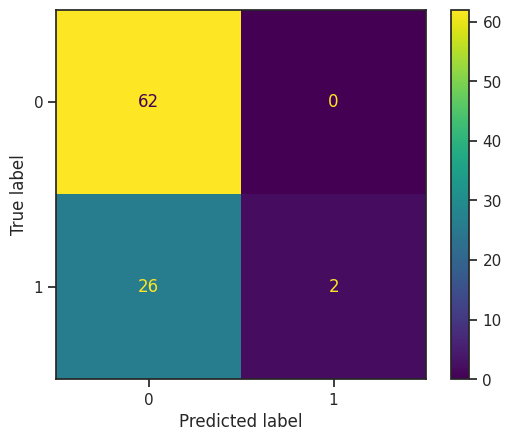

In [21]:
cm = confusion_matrix(y_test, y_test_pred, labels=model_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_search.classes_)
disp.plot()
plt.show()

##Outlier Detection and Removal

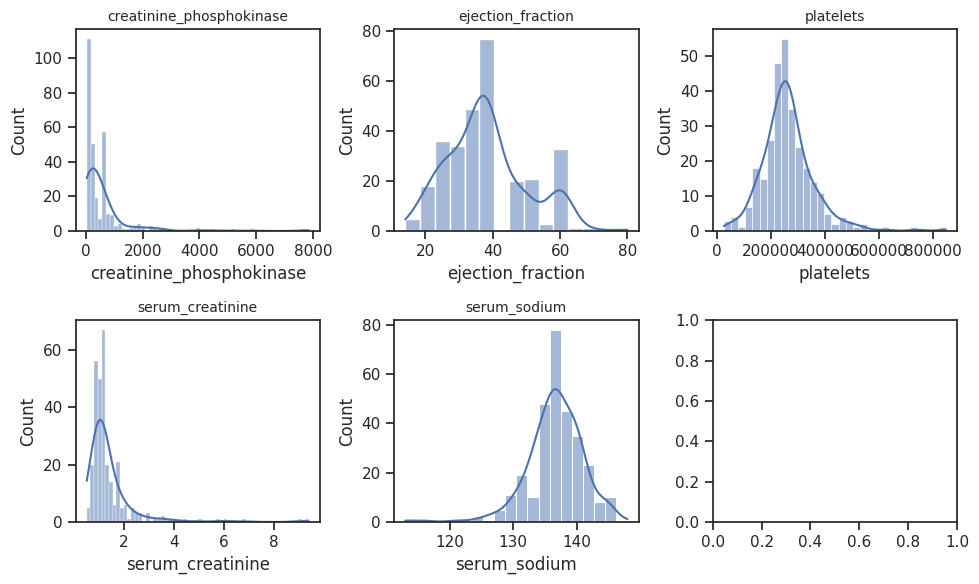

In [22]:
#using distribution to check for outliers based from the result of boxplot

# Create a new copy of the DataFrame
heart_new = heart_all.copy()

heart_column = ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']

# Check for outliers
fig, axes = plt.subplots(2, 3, figsize=(10, 6))  # 1 row, 5 columns for 5 variables

for i, column in enumerate(heart_column):
    row = i // 3
    col = i % 3
    sns.histplot(data=heart_all[column], ax=axes[row,col],kde=True)
    axes[row, col].set_title(f'{column}',fontsize=10)

plt.tight_layout()
plt.show()

In [23]:
#using interquartile ranges

def IQR(df,column):
  #finding the IQR
  q25 = df[column].quantile(0.25)
  q75 = df[column].quantile(0.75)
  iqr = q75 - q25

  #finding the upper and lower limits
  upper_limit = q75 + 1.5 * iqr
  lower_limit = q25 - 1.5 * iqr
  return df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

In [24]:
#IQR for dataset
heart_iqr = IQR(heart_new,heart_column)

#drop first the nan values
heart_new1 = heart_iqr.dropna(subset=heart_column)

#merge the heart_iqr with heart_new while dropping all NaNs from
heart_newer = heart_new.copy()
heart_newer[heart_column] = heart_new1[heart_column]
heart_final = heart_newer.dropna()

#heart_newer = pd.merge(heart_new, heart_iqr, on=heart_column, how='inner')
#print(heart_newer)
print(heart_final)


     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0     75        0                     582.0         0               20.0   
2     65        0                     146.0         0               20.0   
3     50        1                     111.0         0               20.0   
5     90        1                      47.0         0               40.0   
6     75        1                     246.0         0               15.0   
..   ...      ...                       ...       ...                ...   
291   60        0                     320.0         0               35.0   
292   52        0                     190.0         1               38.0   
293   63        1                     103.0         1               35.0   
294   62        0                      61.0         1               38.0   
298   50        0                     196.0         0               45.0   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0          

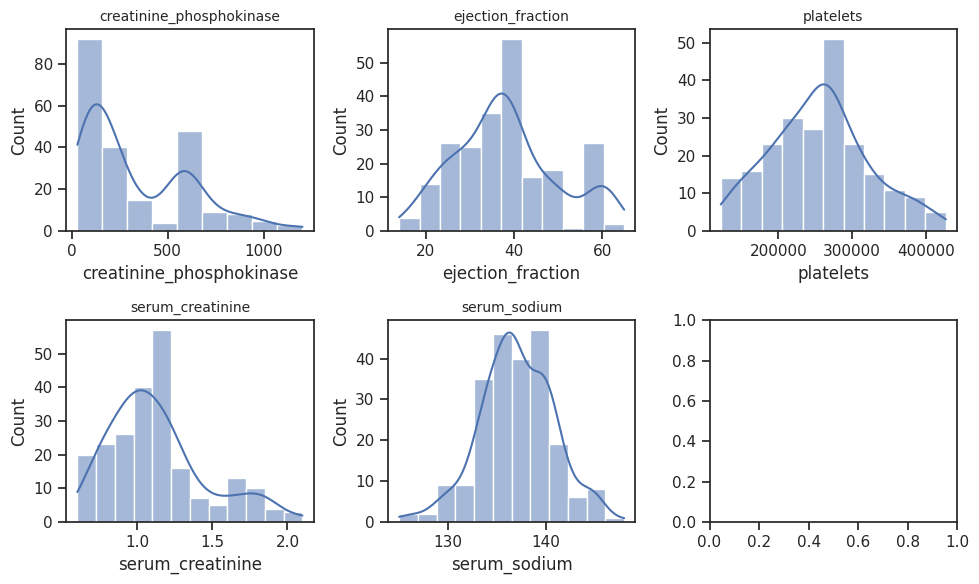

In [25]:
#using distribution to check for outliers

# Check for outliers
fig, axes = plt.subplots(2, 3, figsize=(10, 6))  # 1 row, 5 columns for 5 variables

for i, column in enumerate(heart_column):
    row = i // 3
    col = i % 3
    sns.histplot(data=heart_final[column], ax=axes[row,col],kde=True)
    axes[row, col].set_title(f'{column}',fontsize=10)

plt.tight_layout()
plt.show()

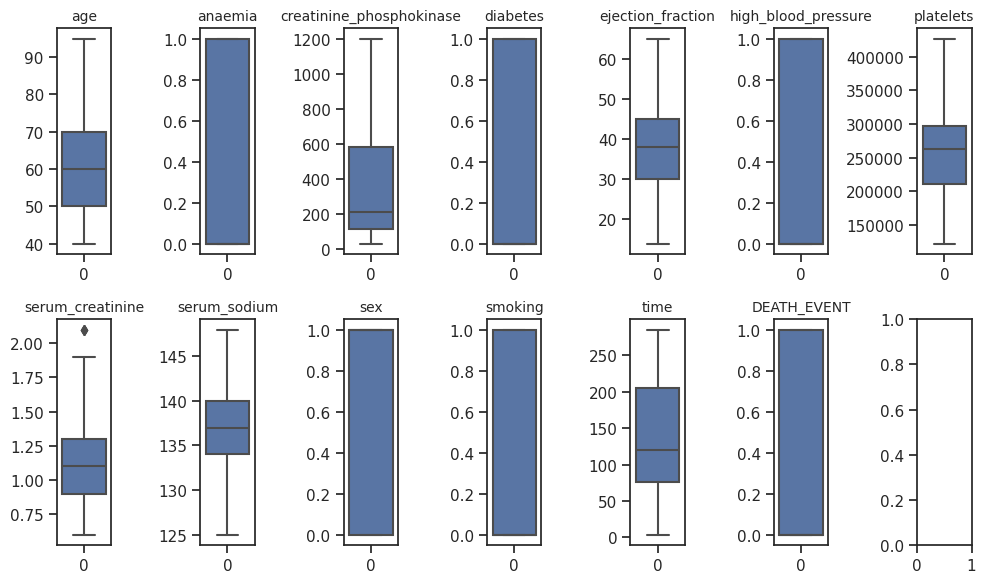

In [26]:
# Check for outliers
fig, axes = plt.subplots(2, 7, figsize=(10, 6))  # 1 row, 5 columns for 5 variables

for i, column in enumerate(heart_final.columns):
    row = i // 7
    col = i % 7
    sns.boxplot(data=heart_final[column], ax=axes[row,col])
    axes[row, col].set_title(f'{column}',fontsize=10)

plt.tight_layout()
plt.show()


### Separating the X and y variables

In [27]:
#Splitting the X and y variables
X_final = heart_final.drop('DEATH_EVENT',axis=1)
y_final = heart_final['DEATH_EVENT']

In [28]:
# Your Code Here
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size=0.3, random_state=0)

In [29]:
#scaling of features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

X_train_scaledf = scaler.fit_transform(X_train_final)
X_train_scf = pd.DataFrame(X_train_scaledf)
X_test_scaledf = scaler.fit_transform(X_test_final)
X_test_scf = pd.DataFrame(X_test_scaledf)

###Run and fit the model using removed outliers

In [30]:
from sklearn.neighbors import KNeighborsClassifier
# Running our Regression Model
knn_reg = KNeighborsClassifier(n_neighbors=9)
knn_reg.fit(X_train_scf, y_train_final)

KNeighborsClassifier(n_neighbors=9)

In [31]:
# Your Code Here
#Testing our Prediction
y_pred_final = knn_reg.predict(X_test_scf)

#check the metrics

print(confusion_matrix(y_test_final, y_pred_final))
print(classification_report(y_test_final, y_pred_final))

[[48  2]
 [13  5]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.86        50
           1       0.71      0.28      0.40        18

    accuracy                           0.78        68
   macro avg       0.75      0.62      0.63        68
weighted avg       0.77      0.78      0.74        68



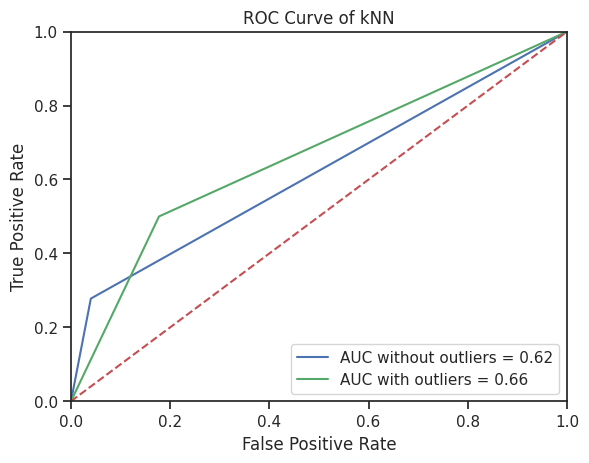

In [32]:
fpr, tpr, threshold = roc_curve(y_test_final, y_pred_final)
fpr1, tpr1, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc1 = auc(fpr1, tpr1)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC without outliers = %0.2f' % roc_auc)
plt.plot(fpr1, tpr1, 'g', label = 'AUC with outliers = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [33]:
train_accuracies = []
test_accuracies = []

# Range of k we want to try
k_values = range(1, 26)

for k in k_values:
    # Create KNN model with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model with training data
    knn.fit(X_train_scf, y_train_final)

    # Predict on training data and calculate training accuracy
    y_train_pred = knn.predict(X_train_scf)
    train_accuracy = accuracy_score(y_train_final, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Predict on test data and calculate test accuracy
    y_test_pred = knn.predict(X_test_scf)
    test_accuracy = accuracy_score(y_test_final, y_test_pred)
    test_accuracies.append(test_accuracy)
    # Print results with 4 decimal places
    print(f'k={k:2d}  Train Accuracy: {train_accuracy:.4f}  Test Accuracy: {test_accuracy:.4f}')

k= 1  Train Accuracy: 1.0000  Test Accuracy: 0.6912
k= 2  Train Accuracy: 0.7949  Test Accuracy: 0.7794
k= 3  Train Accuracy: 0.8141  Test Accuracy: 0.7500
k= 4  Train Accuracy: 0.7821  Test Accuracy: 0.7500
k= 5  Train Accuracy: 0.7885  Test Accuracy: 0.7647
k= 6  Train Accuracy: 0.7821  Test Accuracy: 0.7647
k= 7  Train Accuracy: 0.8077  Test Accuracy: 0.7647
k= 8  Train Accuracy: 0.7821  Test Accuracy: 0.7500
k= 9  Train Accuracy: 0.8013  Test Accuracy: 0.7794
k=10  Train Accuracy: 0.7756  Test Accuracy: 0.7353
k=11  Train Accuracy: 0.7949  Test Accuracy: 0.7794
k=12  Train Accuracy: 0.7564  Test Accuracy: 0.7647
k=13  Train Accuracy: 0.7821  Test Accuracy: 0.7647
k=14  Train Accuracy: 0.7628  Test Accuracy: 0.7353
k=15  Train Accuracy: 0.7692  Test Accuracy: 0.7353
k=16  Train Accuracy: 0.7500  Test Accuracy: 0.7206
k=17  Train Accuracy: 0.7628  Test Accuracy: 0.7206
k=18  Train Accuracy: 0.7372  Test Accuracy: 0.7353
k=19  Train Accuracy: 0.7436  Test Accuracy: 0.7353
k=20  Train 

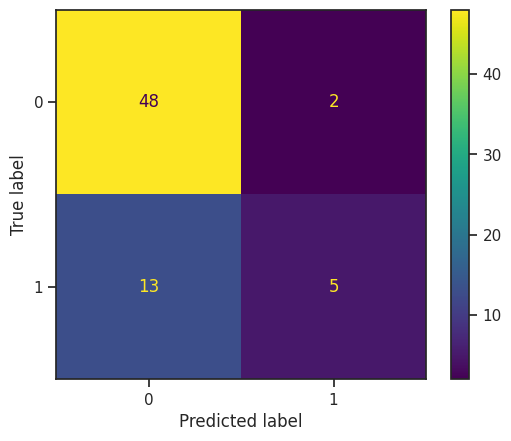

In [34]:
cm = confusion_matrix(y_test_final, y_pred_final, labels=model_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_search.classes_)
disp.plot()
plt.show()

#Summary Report

Heart Failure Prediction

Source: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/



##<br>**Introduction**:

Heart failure is considered a growing public health issue considering it affects 64 million people globally in 2023 (Shahim et al., 2023). In fact, the Philippines recorded a prevalence of 16 out of 1000 patients in a 2017 study (Tumanan-Mendoza et al., 2017).  Heart failure, result of of cardiovascular diseases (CVD), occurs when the heart is unable to effectively pump an adequate volume of blood to meet the body's requirements.

<br> Preventing cardiovascular diseases can be achieved through the implementation of population-wide strategies that target behavioral risk factors, including tobacco use, unhealthy diet, obesity, physical inactivity, and harmful alcohol consumption. Furthermore, existing risk factors can be identified early on so that management can be implemented to prevent heart failure

<br>The use of machine learning in early detection and prevention have drawn a lot of attention considering the large volumes of data that can be analyzed.
There have been different approaches in finding the best method for prediciting heart failure such as the use of decision tree algorithm, ensemble subspace discriminant algorithm, Naives Bayes, and logistic regression among others (Mahmud et al., 2023). In this exercise, the use of K-nearest Neighbours (KNN) Classifier is used to predict the likelihood of cardiac failure considering different risk factors.

##<br>**Methodology**:

KNN regression, a non-parametric technique, provides an intuitive way to approximate the connection between independent variables and the continuous outcome by averaging observations within the same vicinity. In KNN regression, the prediction of a dependent variable for a data point relies on calculating the average or mean of the target values of its K closest neighbors within the training dataset. The user-defined hyperparameter, K, dictates the quantity of nearest neighbors considered when making the prediction

<br>The following steps show how the KNN Classifier is performed (Christopher, 2021):

1. **Choose a value for K** - in KNN Classifier, you start by selecting a value for K, representing the number of nearest neighbors used for making predictions.
2. **Calculate the distance** - fThe algorithm computes the distance between the new data point and every other data point in the dataset. Common distance metrics include Euclidean, Manhattan, or Minkowski distances.
3. **Find the K nearest neighbors** - By ranking the calculated distances, the algorithm identifies the K data points nearest to the new data point.
4. **Calculate the prediction** - For classification, the algorithm predicts the value of the dependent variable for the new data point by taking the majority vote (mode) of the target values of the K nearest neighbors. The class with the highest count becomes the predicted class for the new data point.



##**Dataset**:

This exercise uses a dataset from Kaggle which was uploaded by user named Larxel in 2020 from the research of Chicco & Jurman (2020).  

<br> The data set has 298 entry with 13 variables where the variable of interest for prediction is **DEATH_EVENT**. Below shows the description for each of the variables used in this exercise.

<br> Age - Age of the patient
<br> Anaemia - decrease of red blood cells or hemoglobin (1-yes, 0-no)
<br> Creatinine_Phospokinase - level of the CPK enzyme in the blood (mcg/L)
<br> Diabetes -  if the patien has diabetes (1-yes, 0-no)
<br> Ejection Fraction - percentage of blood leaving the heart at each contraction (%)
<br> High Blood Pressure - if the patient has hypertension (1-yes, 0-no)
<br> Serum Creatinine - level of serum creatinine in the blood (mg/dL)
<br> Serum Sodium - level of serum sodium in the blood (mEq/L)
<br> Sex - Woman or man (0-woman, 1-man)

##<br>**Quick Data Exploratory Analysis**

<br> The summarized statistical data shows the mean, standard deviation, and the percentiles of the different risk factors for Heart Failure.

<br>Age has mean value of around 60 years old with a standard deviation of 12. Majority of the subjects are with in 48-72 years old. Interestingly, the Creatinine Phospokinase has a high mean value of 581 mcg/L when the normal values is just around 10 to 120 mcg/L. This may suggest outliers in the values. Other factors show mean values within or near the normal levels.

<br> The boxplot is also shown to visualize the outlier for each of the risk factors. The following factors show more counts of outliers which include Creatinine Phospokinase, Ejection Fraction, Platelets, Serum Creatinine, and Serum Sodium. This exercise will first proceed by including the outliers in the model. If the accuracy is low, we will proceed with the treatment of outlier. Although outliers were also seen from other risk factors, it was deemed that it can be accepted as the range are not that extreme compared to the mentioned.

<br> Checking for correlation using a plot against **DEATH_EVENT**, the data shows no pattern or correlations with the variable of interest. This is further shown in the correlation matrix where values does not even exceed 0.30.

Total number of death due to heart failure is 85, while 200 for those who were not. In terms of age distribution, higher counts of death were associated with age 45, 50, 60, 65, and 70. Lastly, more deaths were associated with males than females.

##<br> **Data Preprocessing**

The dataset is partitioned into two sets of variables: the risk factors (such as age, anaemia, creatinine phosphokinase, etc.), denoted as x, and the predictor variable (DEATH_EVENT), denoted as y.

Considering varying range of values between the risk factors such as platelets which some values reaching more than 300,000 and serum creatinine with range between 0.5 to 9.0, a scaling method will be applied to the dataset.

##<br> **Model Building**

In this exercise, we will be using KNN Classifier. The reason for choosing this model over KNN Regression is because the predictor value is in binary value (0 or 1). Regression would be more applicable if the predictor is in continuous values.

<br> The following were the steps done:

1. Split the dataset to X_train, X_test, y_train, y_test
2. Perform scaling of features since the range of values for the risk factors are very large
3. Fit the scaled X_train and y_train to the knn classifier
4. Predict the result
5. Perform accuracy assessments using applicable metrics
6. Find the best k value
7. Repeat steps 3 to 5 using result from 6.
8. Treat outliers then repeat steps 1 to 6. (optional)

### <br> Step 1:
<br> The dataset was splitted in train and test set using a ratio of 70:30 as instructed. 70% of the data is for the train dataset, while the 30% is for the test dataset.

### <br> Step 2:
<br> After splitting, the X variables were scaled using the MinMaxScaler function of sklearn. The function transform features or variables by scaling each feature to a given range. The formula is shown below as provided by the sklearn documentation.

<br>
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
<br>
X_scaled = X_std * (max - min) + min

### <br> Step 3:
<br>The scaled X_train and y_train dataset was fitted by calling the function **KNeighborsClassifier**. In this case, the arbitrary k value used is 3.

### <br> Step 4:
<br> After fitting the train dataset, the model was used to predict the test dataset.


### <br> Step 5:
The performance of the model was evaluated using different metrics. Result shows better performance for 0 (no death due to heart failure) compared to 1 (death due to heart failure). Furthermore, accuracy shows a score of 0.72 which is relatively lower.

             precision    recall  f1-score   support

           0       0.78      0.82      0.80        62
           1       0.56      0.50      0.53        28

    accuracy                           0.72        90
    macro avg      0.67      0.66      0.67        90
    weighted avg   0.71      0.72      0.72        90

<br> Step 2 was reviewed if it has an effect to the low accuracy score of the model. But the below result shows better performance if the features were scaled. It is then hypothesized that the low performance might be a result of the detected outliers.

<br>              precision    recall  f1-score   support

           0       0.65      0.73      0.69        62
           1       0.19      0.14      0.16        28

    accuracy                           0.54        90
    macro avg      0.42      0.43      0.43        90
    weighted avg   0.51      0.54      0.52        90

### <br> Step 6:
In this step, the best k values were determined. A code was created to iteratively print the accuracy score of the test and train dataset per k value. The concurrent highest test and train score was observed to be at k = 3. To further visualize this, a plot was created to show the test and train score. K at value 3 shows the highest score compared to the rest of the values

<br> Another methods which is the grid search was conducted to determine the best k values. With cross validation set at 10, result is shown below.

    Fitting 10 folds for each of 14 candidates, totalling 140 fits
    {'n_neighbors': 7}
    Accuracy for our training dataset with tuning is : 70.81%
GridSearchCV recommends a k value of 7 but upon looking at the printed accuracy score, k=3 yields better performance that k=7. Hence, the default k=3 will be used moving forward. No need to step 7 since we already got the best k value at first iteration.

    k= 1  Train Accuracy: 1.0000  Test Accuracy: 0.6667
    k= 2  Train Accuracy: 0.8086  Test Accuracy: 0.7111
    k= 3  Train Accuracy: 0.8182  Test Accuracy: 0.7222
    k= 4  Train Accuracy: 0.7273  Test Accuracy: 0.7000
    k= 5  Train Accuracy: 0.7512  Test Accuracy: 0.7222
    k= 6  Train Accuracy: 0.7081  Test Accuracy: 0.7111
    k= 7  Train Accuracy: 0.7560  Test Accuracy: 0.7000
  
### <br> Step 8: Outlier removal
This step of the exercise is optional and can be performed to see if there is an improvement in accuracy of the mode. Outliers are first identified visually using boxplots. The Creatinine_Phospokinase, Platelets, and Serum Creatinine were the factors considered in the outlier removal. The Interquartile Range (IQR) was used as the basis for the removal of the outliers. The IQR can be used regardless of what distribution a data is following. IQR is expressed as,

<br> IQR = Q3 - Q1, where Q3 is the  third quartile, while Q1 is the first quartile.
<br> Upper limit is Q3*(1.5 * IQR)
<br> Lower limit is Q1*(1.5 * IQR)

<br>The dataframe then is updated to reflect the removal of the outlier where data should be within the upper and lower limit range only. Steps 1 to 6 is then perfomed using this data.

The results as seen below shows an improvement in the accuracy score from 0.72 to 0.75.

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        50
           1       0.55      0.33      0.41        18

    accuracy                            0.75        68
    macro avg       0.67      0.62      0.63        68
    weighted avg    0.72      0.75      0.73        68

<br> Similar above, the k=3 value shows better error results compared to the rest of the k values.

    k= 1  Train Accuracy: 1.0000  Test Accuracy: 0.6912
    k= 2  Train Accuracy: 0.7949  Test Accuracy: 0.7794
    k= 3  Train Accuracy: 0.8141  Test Accuracy: 0.7500
    k= 4  Train Accuracy: 0.7821  Test Accuracy: 0.7500
    k= 5  Train Accuracy: 0.7885  Test Accuracy: 0.7647
    k= 6  Train Accuracy: 0.7821  Test Accuracy: 0.7647
    k= 7  Train Accuracy: 0.8077  Test Accuracy: 0.7647
    k= 8  Train Accuracy: 0.7821  Test Accuracy: 0.7500
    k= 9  Train Accuracy: 0.8013  Test Accuracy: 0.7794
    k=10  Train Accuracy: 0.7756  Test Accuracy: 0.7353


##<br> **Discussion and Conclusion**
<br>KNN Classifier was used to predict the possible death event due to heart failure considering the different risk factors. While doing the exploratory analysis of the data, it was noted that some factors have notably large outlier values. Since outlier were not discussed in class, its treatment was not considered in this exercise.

<br> Looking at the features, the dataset has more incidents no deaths due to heart failure. By looking at it against sex, higher incidence were observed for men in terms of no deaths and with deaths due to heart failure. The age distribution shows higher chances of death due to heart failure at the age between 48 to 72 years old. It is also observed that females have higher incidence of diabetes compared to men. Although, higher creatinine phosphokinase, serum creatinine, serum sodium were associated with men than women.

<br>Evaluating the performance of the model using k value at 3, it is observed that the accuracy score is low at around 70%. A sensitivity was done by checking the effect of scaling the features were result shows lower performance if features were not scaled. The next possible reason considered was the presence of outliers which is more pronounced for creatinine phosphokinase and platelets. Bhattacharya et al., (2017) mentioned that the presence of outliers has an adverse effect on the performance of pattern classification algorithm such as the KNN Classification model. Hence, outliers should be addressed first in order to improve model performance.

<br>The confusion matrix shows higher percentage of true negative at 62%, but a lower percetage of true positive at 2%. False negative was at 26% while false positive records 0 incidence.

<br>When the outliers were removed, we noted an increase in model performance as accuracy improved from 0.72 to 0.75. Although, there is no certainty if the increase holds significance. The confusion matrix shows lower percentage of true negative at 45%, while true positive increased to 6%. Another interesting observation is when using the ROC-AUC metrics, the model with outlier (0.66) seems to outperform the model without outlier (0.62) by 0.04. Overall, the AUC score performs a little bit better than the 0.5 AUC score which indicates random result.

<br> The KNN classifier relatively showed good model performance in predicting the Death Event due to heart failure. Although, other models or an ensemble can still be explored to see if the accuracy would increase.

<br> *ChatGPT was used for correction of grammatical errors.

##<br> **References**:

<br> Bhattacharya, G., Ghosh, K., Chowdhury, A. S. (2017). KNN classification with an outlier informative distance measure. Lecture Notes in Computer Science, 21–27. https://doi.org/10.1007/978-3-319-69900-4_3

<br>Christopher, A. (2021, February 3). K-Nearest Neighbor. Medium. https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4

<br>Mahmud, I., Kabir, M. M., Mridha, M. F., Alfarhood, S., Safran, M., & Che, D. (2023). Cardiac Failure Forecasting Based on Clinical Data Using a Lightweight Machine Learning Metamodel. Diagnostics (Basel, Switzerland), 13(15), 2540. https://doi.org/10.3390/diagnostics13152540


<br>Shahim, B., Kapelios, C. J., Savarese, G., & Lund, L. H. (2023). Global Public Health Burden of Heart Failure: An Updated Review. Cardiac failure review, 9, e11. https://doi.org/10.15420/cfr.2023.05


<br>Tumanan-Mendoza, B. A., Mendoza, V. L., Bermudez-Delos Santos, A. A., Punzalan, F. E., Pestaño, N. S., Natividad, R. B., Shiu, L. A., & Macabeo, R. (2017). Epidemiologic burden of hospitalization for congestive heart failure among adults aged ≥19 years in the Philippines. Heart Asia, 9(1), 76–80. https://doi.org/10.1136/heartasia-2016-010862
